In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from dotenv import load_dotenv
import os

# Estilos para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Cargar las variables del .env
load_dotenv()

True

In [2]:
DATA_DIR = os.getenv('DATA_DIR')

In [5]:

df_feb2019 = pd.read_csv(f'{DATA_DIR}/periodo_1_PrePandemia/02-2019.csv', sep=';')
df_feb2020 = pd.read_csv(f'{DATA_DIR}/periodo_2_PrimerosCasos/02-2020.csv', sep=';')

In [6]:
df_feb2019.head(70)


,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,1001,2019-02-01 00:00:00,M30,12,NaN,0,10.0,N,5
1,1001,2019-02-01 00:15:00,M30,36,NaN,0,34.0,N,5
2,1001,2019-02-01 00:30:00,M30,0,0.0,0,0.0,N,5
3,1001,2019-02-01 00:45:00,M30,0,0.0,0,0.0,N,5
4,1001,2019-02-01 01:00:00,M30,0,0.0,0,0.0,N,5
...,...,...,...,...,...,...,...,...,...
65,1001,2019-02-01 16:15:00,M30,2460,9.0,0,64.0,N,5
66,1001,2019-02-01 16:30:00,M30,2280,7.0,0,64.0,N,5
67,1001,2019-02-01 16:45:00,M30,2436,10.0,0,60.0,N,5
68,1001,2019-02-01 17:00:00,M30,2376,11.0,0,61.0,N,5


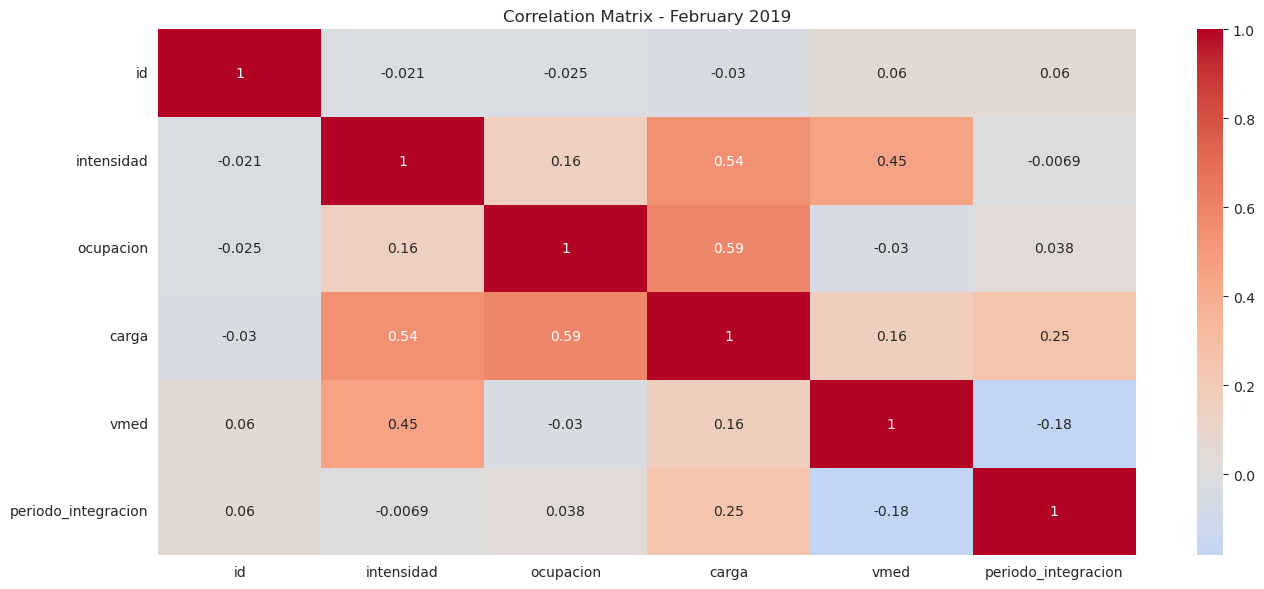

In [7]:
sns.heatmap(df_feb2019.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - February 2019')
plt.tight_layout()
plt.show()

In [11]:
# Los juntamos en uno solo
df = pd.concat([df_feb2019, df_feb2020], ignore_index=True)

print("Primeras filas:")
print(df.head())
print("\nTamaño del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")
print(df.isnull().sum())


Primeras filas:
     id                fecha tipo_elem  intensidad  ocupacion  carga  vmed  \
0  1001  2019-02-01 00:00:00       M30          12        NaN      0  10.0   
1  1001  2019-02-01 00:15:00       M30          36        NaN      0  34.0   
2  1001  2019-02-01 00:30:00       M30           0        0.0      0   0.0   
3  1001  2019-02-01 00:45:00       M30           0        0.0      0   0.0   
4  1001  2019-02-01 01:00:00       M30           0        0.0      0   0.0   

  error  periodo_integracion  
0     N                    5  
1     N                    5  
2     N                    5  
3     N                    5  
4     N                    5  

Tamaño del dataset: (20987238, 9)

Tipos de datos:
id                       int64
fecha                   object
tipo_elem               object
intensidad               int64
ocupacion              float64
carga                    int64
vmed                   float64
error                   object
periodo_integracion      int6

In [13]:
# Convertir fecha a datetime (importante para trabajar con fechas)
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d %H:%M:%S')

# Extraer variables útiles de la fecha
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['día'] = df['fecha'].dt.day
df['hora'] = df['fecha'].dt.hour
df['día_semana'] = df['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo

df.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,año,mes,día,hora,día_semana
0,1001,2019-02-01 00:00:00,M30,12,NaN,0,10.0,N,5,2019,2,1,0,4
1,1001,2019-02-01 00:15:00,M30,36,NaN,0,34.0,N,5,2019,2,1,0,4
2,1001,2019-02-01 00:30:00,M30,0,0.0,0,0.0,N,5,2019,2,1,0,4
3,1001,2019-02-01 00:45:00,M30,0,0.0,0,0.0,N,5,2019,2,1,0,4
4,1001,2019-02-01 01:00:00,M30,0,0.0,0,0.0,N,5,2019,2,1,1,4


In [20]:
df[df['vmed'] < 0].shape

(0, 14)

# Analisis de Intensidad Por Periodo

In [23]:
intensidad_por_año = df.groupby('año')['intensidad'].agg([
    ('media', 'mean'),
    ('mediana', 'median'),
    ('máximo', 'max'),
    ('mínimo', 'min'),
    ('desv_est', 'std'),
    ('contador', 'count')
]).round(2)

print("\nIntensidad por año:")
print(intensidad_por_año)


Intensidad por año:
       media  mediana  máximo  mínimo  desv_est  contador
año                                                      
2019  451.17    211.0   91719       0    740.97  10060856
2020  446.83    209.0   40405       0    695.97  10926382


In [28]:
# Intensidad por hora del día (¿a qué hora hay más tráfico?)
intensidad_por_hora = df.groupby('hora')['intensidad'].agg([
    ('media', 'mean'),
    ('desv_est', 'std')
]).round(2)

print("\nIntensidad media por hora del día:")
print(intensidad_por_hora)


Intensidad media por hora del día:
       media  desv_est
hora                  
0     197.32    363.71
1     133.48    313.38
2      95.69    318.05
3      77.66    277.49
4      71.13    275.03
5      86.62    275.37
6     205.02    431.22
7     453.63    758.12
8     621.72    856.35
9     633.44    828.05
10    559.94    744.98
11    567.80    729.29
12    596.30    751.51
13    626.72    797.96
14    687.78    874.82
15    624.16    836.14
16    600.03    804.72
17    649.42    823.99
18    687.31    852.48
19    692.05    865.20
20    642.06    833.79
21    533.99    737.34
22    374.17    564.28
23    264.60    430.03


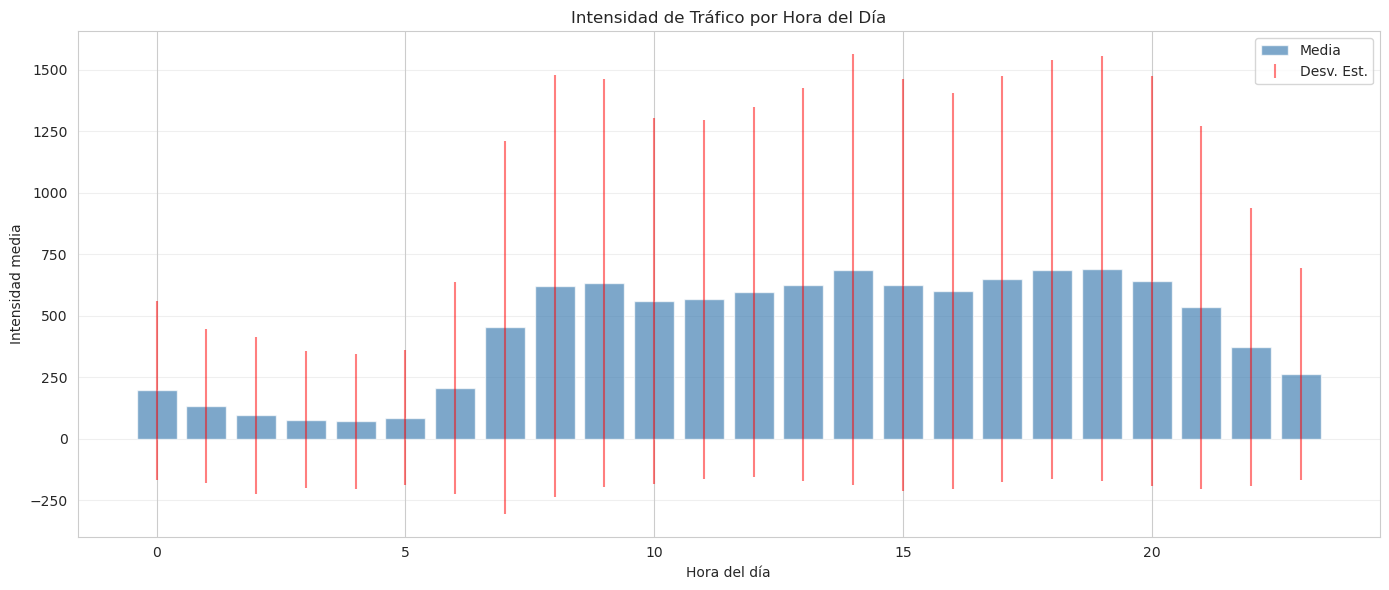

In [29]:
# Crear gráfico de barras para intensidad por hora
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(intensidad_por_hora.index, intensidad_por_hora['media'], color='steelblue', alpha=0.7, label='Media')
ax.errorbar(intensidad_por_hora.index, intensidad_por_hora['media'], 
            yerr=intensidad_por_hora['desv_est'], fmt='none', color='red', alpha=0.5, label='Desv. Est.')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Intensidad media')
ax.set_title('Intensidad de Tráfico por Hora del Día')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
# Crear variable: ¿es fin de semana?
df['es_fin_semana'] = df['día_semana'].isin([5, 6])  # 5=Sábado, 6=Domingo

# Comparar
comparativa = df.groupby(['año', 'es_fin_semana'])['intensidad'].agg([
    ('media', 'mean'),
    ('desv_est', 'std'),
    ('n_registros', 'count')
]).round(2)

print("\nComparativa laborables vs fin de semana:")
print(comparativa)


Comparativa laborables vs fin de semana:
                     media  desv_est  n_registros
año  es_fin_semana                               
2019 False          488.90    751.77      7190843
     True           356.62    704.39      2870013
2020 False          486.03    740.39      7512955
     True           360.55    577.16      3413427
